In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
from sklearn impo

In [7]:
df1 = pd.read_csv('dataset_00_with_header.csv',encoding='utf-8')

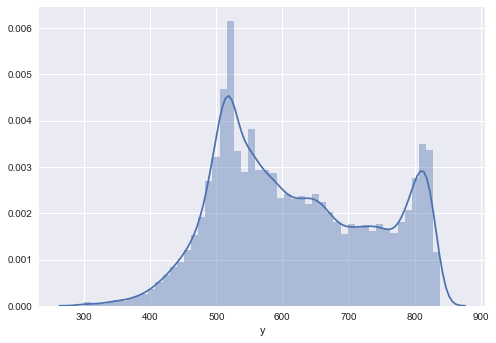

In [3]:
# with matplotlib
#import matplotlib.pyplot as plt
#plt.hist(df2['y'],bins=100)
#plt.xlabel('target variable',fontsize=18)

import seaborn as sns
# Our SalesPrice is skewed right (check plot below). I'm logtransforming it. 
ax = sns.distplot(df1['y'])

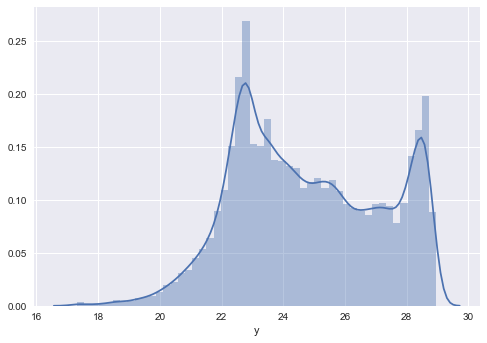

In [4]:
## Log/sqrt transformation of labels
ax = sns.distplot(np.sqrt(df1['y']))

In [5]:
#

#### Checking for NAs

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('y',axis=1), df1['y'], test_size=0.33, random_state=42)

#Checking for missing data
NAs = pd.concat([X_train.isnull().sum(), X_test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0].head()

ImportError: cannot import name __check_build

In [56]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
x242,93339,93
x295,86533,87
x304,81875,82
x098,80681,81
x155,79051,79
x259,77432,77
x255,76913,77
x257,76913,77
x256,76913,77
x302,73069,73


In [3]:
import numpy as np
np.isnan(df1).sum()
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df1)
df2 = imp.transform(df1)
df2 = pd.DataFrame(df2,columns=df1.columns)

NameError: name 'df1' is not defined

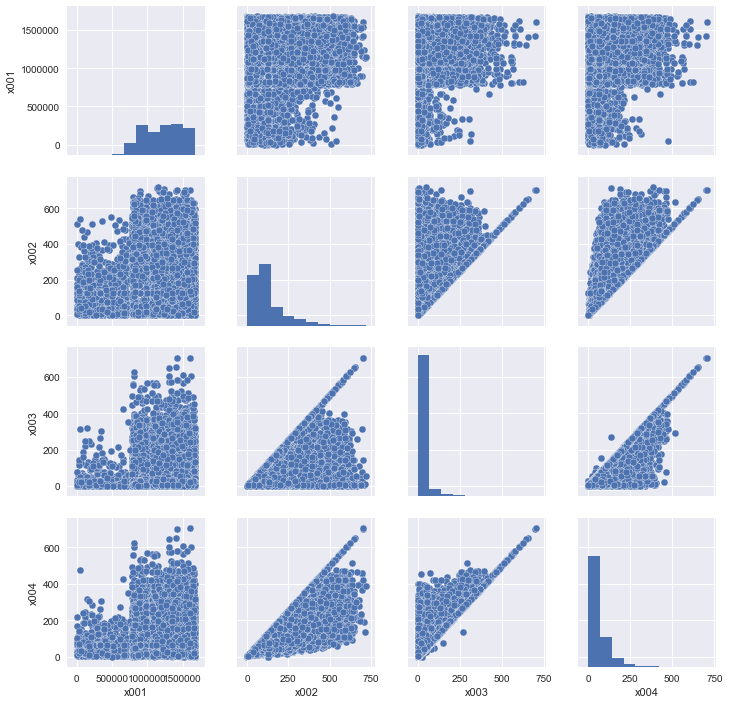

In [54]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df2.iloc[:,0:4], size = 2.5)
plt.show();


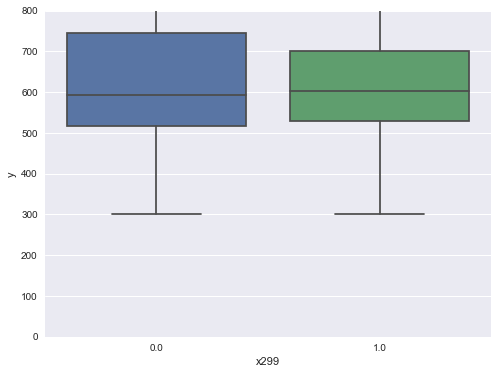

In [48]:
##Exploration of data

#box plot overallqual/saleprice
var = 'x299'
data = pd.concat([df2['y'], df2[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="y", data=data)
fig.axis(ymin=0, ymax=800);

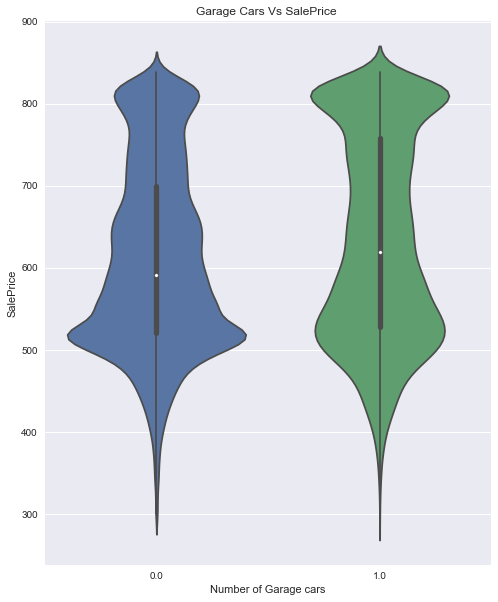

In [71]:
sns.violinplot(df2["x006"],df2["y"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars");

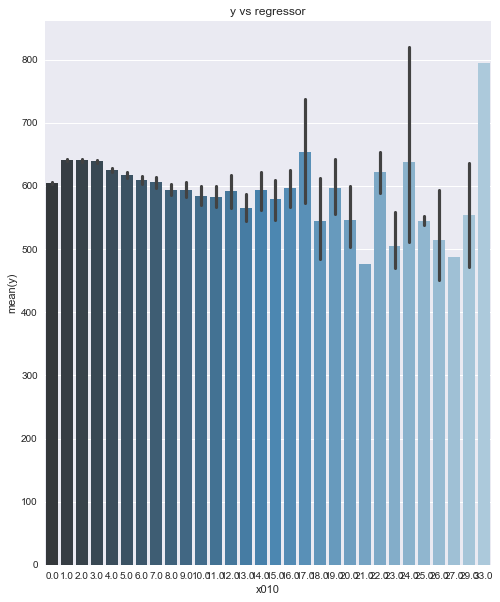

In [73]:
sns.barplot(df2["x010"],df2["y"],palette="Blues_d")
plt.title("y vs regressor");

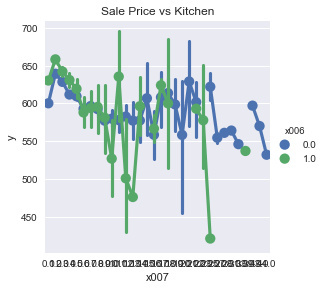

In [76]:
sns.factorplot("x007","y",data=df2,hue="x006")
plt.title("Sale Price vs Kitchen");

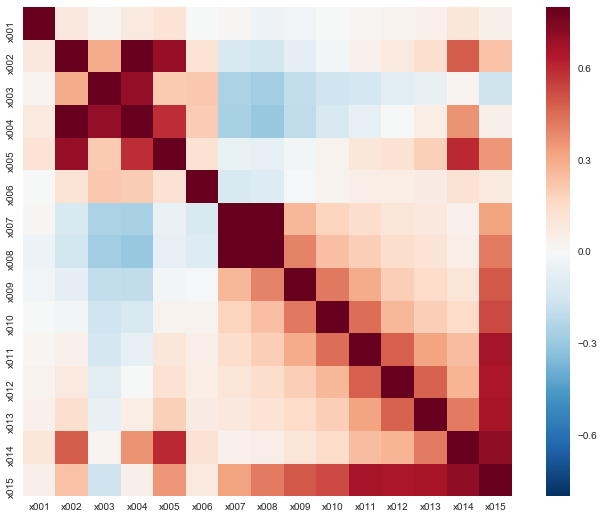

In [52]:
#correlation matrix
corrmat = df2.iloc[:,0:15].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

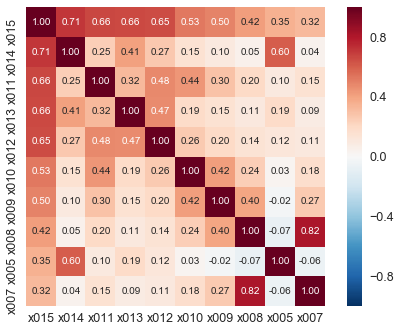

In [53]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'x015')['x015'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [69]:
attrs = corrmat.iloc[:-1,:-1] # all except target
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)),
                                                 important_corrs[key]) for key in important_corrs])), 
    columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
0,"(x002, x004)",0.83
2,"(x007, x008)",0.82
4,"(x003, x004)",0.71
3,"(x002, x005)",0.7
1,"(x005, x014)",0.6
5,"(x004, x005)",0.59



In the search for normality

The point here is to test 'y' in a very lean way. We'll do this paying attention to:

    Histogram - Kurtosis and skewness.
    Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.
    
Continue data exploration very good article
https://www.kaggle.com/pmarcelino/house-prices-advanced-regression-techniques/comprehensive-data-exploration-with-python

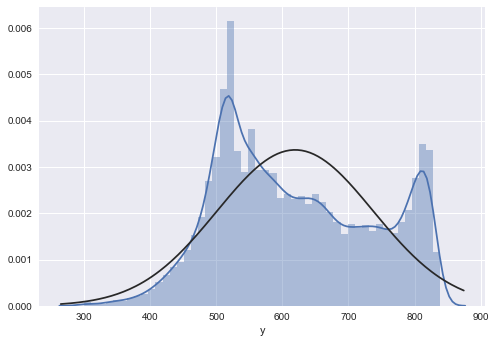

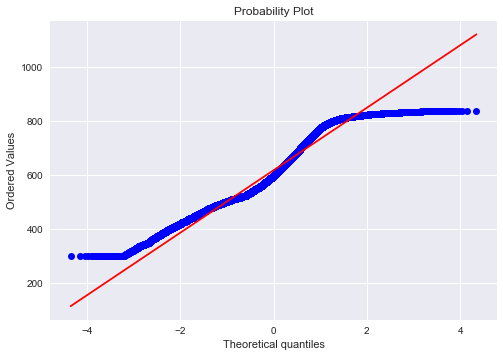

In [59]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(df2['y'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df2['y'], plot=plt)

# One hot encoding

In [67]:
# Convert categorical features using one-hot encoding.
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)
    
    # Dropping one of the columns actually made the results slightly worse.
    # if drop_name is not None:
    #     dummies.drop(["_" + column_name + "_" + drop_name], axis=1, inplace=True)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df

In [68]:
df2.head(2)

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1.5e+06,1.3e+02,26,65,8,1,0,1,0,0,...,0,0.79,0,0,0,0,2.9,0,1,7.1e+02
1,8.2e+05,4,3,3,4,0,2,2,0,0,...,5.2e+03,0.93,1,1,1,0,2.9,0,1,5.6e+02


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2.drop('y',axis=1), df2['y'], test_size=0.33, random_state=42)

If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. So scaling should be done

https://stats.stackexchange.com/questions/10289/whats-the-difference-between-normalization-and-standardization

http://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/

In [13]:
from sklearn import preprocessing
import numpy as np
scaler = preprocessing.StandardScaler().fit(X_train)

In [61]:
df2.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332.0,125.711727,25.541238,65.393212,8.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.794034,0.0,0.0,0.0,0.0,2.948758,0.0,1.037957,706.0
1,823066.0,4.000000,3.000000,3.000000,4.0,0.0,2.0,2.0,0.0,0.0,...,5206.0,0.933900,1.0,1.0,1.0,0.0,2.948758,0.0,1.037957,558.0
2,1089795.0,125.711727,25.541238,65.393212,96.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.794034,0.0,0.0,0.0,0.0,2.948758,0.0,1.037957,577.0
3,1147758.0,63.000000,14.000000,38.000000,258.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.794034,1.0,1.0,1.0,0.0,2.948758,0.0,1.037957,526.0
4,1229670.0,34.000000,25.000000,29.000000,34.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.794034,0.0,0.0,0.0,0.0,2.948758,0.0,1.037957,496.0


In [62]:
df2.describe()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.218244e+06,125.711727,25.541238,65.393212,178.238545,0.314040,0.694000,1.388220,1.192980,1.026990,...,1.181960e+04,0.794034,0.543320,0.558030,0.581830,0.106240,2.948758,6410.882910,1.037957,619.198230
std,2.728977e+05,102.630157,43.458335,56.370127,120.656530,0.464135,1.379378,2.282805,2.031083,1.713823,...,3.226469e+04,0.186556,0.498122,0.496624,0.493261,0.308146,1.105054,24190.243313,0.140736,118.461932
min,5.170000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,300.000000
25%,9.743635e+05,46.000000,4.000000,26.000000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.794034,0.000000,0.000000,0.000000,0.000000,2.948758,0.000000,1.037957,524.000000
50%,1.235926e+06,125.711727,14.000000,65.393212,159.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.794034,1.000000,1.000000,1.000000,0.000000,2.948758,0.000000,1.037957,599.000000
75%,1.445326e+06,152.000000,25.541238,77.000000,237.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,1.295600e+04,0.794034,1.000000,1.000000,1.000000,0.000000,2.948758,0.000000,1.037957,720.000000
max,1.677197e+06,718.000000,704.000000,704.000000,827.000000,1.000000,44.000000,108.000000,81.000000,33.000000,...,2.696702e+06,13.035300,1.000000,1.000000,1.000000,1.000000,9.000000,785537.000000,5.156900,839.000000


# Lets apply Linear Regression
y is expressed a linear combination of multiple vaiables
Important Points:

1. There must be linear relationship between independent and dependent variables
2. Multiple regression suffers from multicollinearity, autocorrelation, heteroskedasticity.
3. Linear Regression is very sensitive to Outliers. It can terribly affect the regression line and eventually the forecasted values.
4. Multicollinearity can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. The result is that the coefficient estimates are unstable
5. In case of multiple independent variables, we can go with forward selection, backward elimination and step wise approach for selection of most significant independent variables.



Goodness of fit for different models:-
1. statistical significance of parameters
2. R-square
3. Adjusted r-square
4. AIC
5. BIC
6. error term
7. Mallow’s Cp criterion. This essentially checks for possible bias in your model, by comparing the model with all possible submodels (or a careful selection of them).

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=-1)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

why copy_X has an impact on the intercept if reruning the model????

In [166]:
print(model.intercept_)

555.520893657


## Printing model coefficients

In [222]:
print (model.coef_.shape)
coefficients = pd.DataFrame(model.coef_,columns=['value'])
coefficients['regressor'] = X_train.columns
coefficients = coefficients.loc[:,['regressor','value']]
coefficients.head(2)

(304,)


,regressor,value
0,x001,0.000006
1,x002,-0.160931


R^2 (coefficient of determination) regression score function.

In [224]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(X_train)
print ('r squared on train data {}%'.format(round(r2_score(y_train, y_pred_train)*100,2)))

y_pred = model.predict(X_test)

r squared on train data 84.62%


# Checking with statsmodels library

Statsmodels follows largely the traditional model where we want to know how well a given model fits the data, and what variables "explain" or affect the outcome, or what the size of the effect is. 
As a consequence, the emphasis in the supporting features of statsmodels is in analysing the training data which includes hypothesis tests and goodness-of-fit measures
https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression

Element 	Description
Dep. Variable 	Which variable is the response in the model
Model 	What model you are using in the fit
Method 	How the parameters of the model were calculated
No. Observations 	The number of observations (examples)
DF Residuals 	Degrees of freedom of the residuals. Number of observations – number of parameters
DF Model 	Number of parameters in the model (not including the constant term if present)

R-squared 	The coefficient of determination. A statistical measure of how well the regression line approximates the real data points
Adj. R-squared 	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals
F-statistic 	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals
Prob (F-statistic) 	The probability that you would get the above statistic, given the null hypothesis that they are unrelated
Log-likelihood 	The log of the likelihood function.
AIC 	The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
BIC 	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.


coef 	The estimated value of the coefficient
std err 	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.
t 	The t-statistic value. This is a measure of how statistically significant the coefficient is.
P > |t| 	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
[95.0% Conf. Interval] 	The lower and upper values of the 95% confidence interval

Skewness 	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).
Kurtosis 	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).
Omnibus 	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.
Prob(Omnibus) 	The above statistic turned into a probability
Jarque-Bera 	A different test of the skewness and kurtosis
Prob (JB) 	The above statistic turned into a probability
Durbin-Watson 	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis
Cond. No 	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).

In [208]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit regression model
results = sm.OLS(y_train, X_train).fit()

# Inspect the results
print results.summary()

predictions = results.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.818e+04
Date:                Fri, 14 Apr 2017   Prob (F-statistic):               0.00
Time:                        20:49:25   Log-Likelihood:            -3.5907e+05
No. Observations:               67000   AIC:                         7.187e+05
Df Residuals:                   66739   BIC:                         7.210e+05
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x001        2.134e-05   7.44e-07     28.667      0.0

http://scikit-learn.org/stable/modules/model_evaluation.html

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution. Here are the key points to consider on RMSE:

1. The power of ‘square root’  empowers this metric to show large number deviations.
2. The ‘squared’ nature of this metric helps to deliver more robust results which prevents cancelling the positive and negative error values. In other words, this metric aptly displays the plausible magnitude of error term.
3. It avoids the use of absolute error values which is highly undesirable in mathematical calculations.
4. When we have more samples, reconstructing the error distribution using RMSE is considered to be more reliable.
5. RMSE is highly affected by outlier values. Hence, make sure you’ve removed outliers from your data set prior to using this metric.
6. As compared to mean absolute error, RMSE gives higher weightage and punishes large errors.


## Lets compare the results from stats models and scikitlearn and these seem to shell similar results

In [221]:
print ("Scikit learn library")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_test, y_pred)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_test, y_pred)*100,2)))
print ("\n")
print ("Stats models library")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_test, predictions)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_test, predictions)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_test, predictions)*100,2)))

Scikit learn library
neg_mean_squared_error - 2165.91075414
neg_mean_absolute_error - 35.0912501594
neg_median_absolute_error - 27.3809306087
rsquared - 84.61%


Stats models library
neg_mean_squared_error - 2670.30148955
neg_mean_absolute_error - 38.6001907616
neg_median_absolute_error - 29.7440106579
rsquared - 81.02%


# Plot predictions vs actuals
## plot regression line
## compare pred vs actuals

In [259]:
#plt.Line2D(y_test.index, y_test, color = "m",marker = "o", s = 30)
#y_test.index

# Lets try another model

In [11]:
from sklearn import linear_model
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__warningregistry__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',
 'least_angle',
 '

# Polynomial Regression
#### A regression equation is a polynomial regression equation if the power of independent variable is more than 1. 
Polynomial regression is a special case of linear regression. With the main idea of how do you select your features. Looking at the multivariate regression with 2 variables: x1 and x2. Linear regression will look like this: y = a1 * x1 + a2 * x2.

Now you want to have a polynomial regression (let's make 2 degree polynomial). We will create a few additional features: x1*x2, x1^2 and x2^2. So we will get your 'linear regression':

y = a1 * x1 + a2 * x2 + a3 * x1*x2 + a4 * x1^2 + a5 * x2^2

This nicely shows an important concept curse of dimensionality, because the number of new features grows much faster than linearly with the growth of degree of polynomial.

The features of X have been transformed from [x_1, x_2] to [1, x_1, x_2, x_1^2, x_1 x_2, x_2^2], and can now be used within any linear model.

##### Note:- While there might be a temptation to fit a higher degree polynomial to get lower error, this can result in over-fitting. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem.

In [251]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
poly = PolynomialFeatures(degree=2,interaction_only=False,include_bias=True)
#tranformed = poly.fit_transform(X_train.iloc[:,0:2])
# TODO later after selecting the imp predictor variables

# Feature selection in python

### Removing features with low variance
VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [267]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
sel.fit_transform(X_train).shape

(67000, 219)

### Univariate feature selection
Univariate feature selection works by selecting the best features based on univariate statistical tests.
SelectKBest removes all but the k highest scoring features

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):
1. For regression: f_regression, mutual_info_regression #http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
2. For classification: chi2, f_classif, mutual_info_classif

In [274]:
from sklearn.feature_selection import SelectKBest, f_regression
SelectKBest(f_regression, k=100).fit_transform(X_train, y_train)

array([[  2.01000000e+02,   9.40000000e+01,   2.01000000e+02, ...,
          1.00000000e+00,   0.00000000e+00,   8.12575255e-01],
       [  3.00000000e+00,   3.00000000e+00,   1.70000000e+01, ...,
          3.23930885e+00,   0.00000000e+00,   8.12575255e-01],
       [  1.25711727e+02,   6.53932117e+01,   6.80000000e+01, ...,
          3.23930885e+00,   0.00000000e+00,   8.12575255e-01],
       ..., 
       [  2.90000000e+01,   1.90000000e+01,   5.40000000e+01, ...,
          2.00000000e+00,   6.53690000e+04,   9.53100000e-01],
       [  6.00000000e+00,   6.00000000e+00,   6.40000000e+01, ...,
          9.00000000e+00,   9.00000000e+00,   1.66600000e-01],
       [  2.60000000e+01,   2.60000000e+01,   2.60000000e+01, ...,
          4.00000000e+00,   3.32000000e+03,   1.04830000e+00]])

## Recursive feature elimination

# Stepwise Regression

Stepwise regression is a semi-automated process of building a model by successively adding or removing variables based solely on the t-statistics of their estimated coefficients. 


http://trevor-smith.github.io/stepwise-post/

# ‘Ridge Regression‘ and ‘Lasso Regression‘ 
### most fundamental regularization techniques
Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:
1. Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
2. Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

These use regularization techniques which penalize the magnitude of the coefficients of features along with minimizing the error between actual and predicted observations.


1. Ridge Regression:
    Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
    Minimization objective = LeastSquares Objective + α * (sum of square of coefficients)
2. Lasso Regression:
    Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
    Minimization objective = LeastSquares Objective + α * (sum of absolute value of coefficients)
    
##### The size of coefficients increase exponentially with increase in model complexity. This gives some intuition into why putting a constraint on the magnitude of coefficients can be a good idea to reduce model complexity.
What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.


# Ridge Regression

Important Points:
1. The assumptions of this regression is same as least squared regression except normality is not to be assumed
2. It shrinks the value of coefficients but doesn’t reaches zero, which suggests no feature selection feature
3. This is a regularization method and uses l2 regularization.
4. Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda).

The ridge coefficients are a reduced factor of the simple linear regression coefficients and thus never attain zero values but very small values

In [ ]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

cv_ridge = []
for alpha in alphas:
    cv_ridge.append(rmse_cv(Ridge(alpha = alpha)).mean())

# Lasso Regression

Important Points:
1. Lasso regression differs from ridge regression in a way that it uses absolute values in the penalty function, instead of squares. This leads to penalizing (or equivalently constraining the sum of the absolute values of the estimates) values which causes some of the parameter estimates to turn out exactly zero. Larger the penalty applied, further the estimates get shrunk towards absolute zero. This results to variable selection out of given n variables.
2. The assumptions of this regression is same as least squared regression except normality is not to be assumed
3. It shrinks coefficients to zero (exactly zero), which certainly helps in feature selection
4. This is a regularization method and uses l1 regularization
5. If group of predictors are highly correlated, lasso picks only one of them and shrinks the others to zero
6. Like ridge regression, it trades off an increase in bias with a decrease in variance


### Why is the lasso exciting? 
Prior to the lasso, the only “sparse” method was subset selection, finding the best subset of features with which to model the data. But subset selection has problems: searching over all subsets (of a fixed size) is computationally expensive.  In contrast, the lasso efficiently finds a sparse solution by using convex optimization.  In a sense, it is akin to a “smooth version” of subset selection. Note the lasso won’t consider all possible subsets.

Lasso picked 295 variables and eliminated the other 9 variables


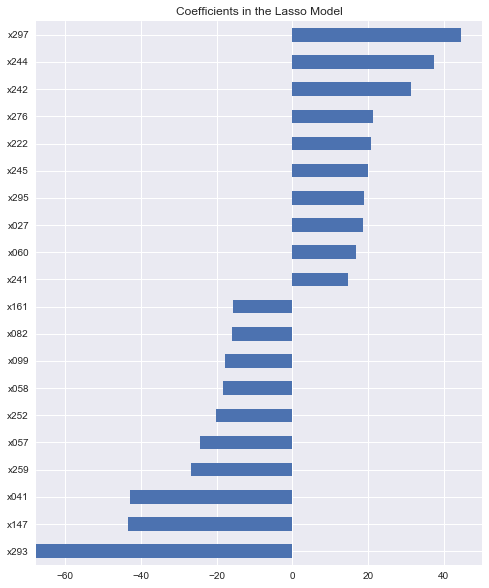

In [64]:
import matplotlib
from sklearn import linear_model
model_lasso = linear_model.LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

### or below code

alphas = [1e-4, 5e-4, 1e-3, 5e-3]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=50000), X_train, y) for alpha in alphas]
pd.Series(cv_lasso, index = alphas).plot()

coef = pd.Series(model_lasso.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

# ElasticNet Regression

ElasticNet is hybrid of Lasso and Ridge Regression techniques. It is trained with L1 and L2 prior as regularizer. Elastic-net is useful when there are multiple features which are correlated. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

Important Points:
1. It encourages group effect in case of highly correlated variables
2. There are no limitations on the number of selected variables
3. It can suffer with double shrinkage

#### l1_ratio : float or array of floats, optional
float between 0 and 1 passed to ElasticNet (scaling between l1 and l2 penalties). For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2 This parameter can be a list, in which case the different values are tested by cross-validation and the one giving the best prediction score is used. Note that a good choice of list of values for l1_ratio is often to put more values close to 1 (i.e. Lasso) and less close to 0 (i.e. Ridge), as in [.1, .5, .7, .9, .95, .99, 1]

#### precompute : True | False | ‘auto’ | array-like
Whether to use a precomputed Gram matrix to speed up calculations. If set to 'auto' let us decide. The Gram matrix can also be passed as argument.


In [21]:
from sklearn import linear_model
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
                                    l1_ratio=[.01, .1, .5, .9, .99], 
                                    max_iter=50000,n_jobs=-1,cv=3,normalize = True).fit(X_train, y_train)
#prediction on train
ens_pred_train = ENSTest.predict(X_train)
ens_pred = ENSTest.predict(X_test)

In [22]:
print ("Train data Elastic Net regression metrics")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_train, ens_pred_train)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_train, ens_pred_train)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_train, ens_pred_train)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_train, ens_pred_train)*100,2)))

print ("Elastic Net regression")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_test, ens_pred)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_test, ens_pred)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_test, ens_pred)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_test, ens_pred)*100,2)))

Train data Elastic Net regression metrics
neg_mean_squared_error - 2218.93584891
neg_mean_absolute_error - 35.6416174552
neg_median_absolute_error - 27.9120246497
rsquared - 84.17%
Elastic Net regression
neg_mean_squared_error - 2214.56928941
neg_mean_absolute_error - 35.7154317599
neg_median_absolute_error - 27.8322127189
rsquared - 84.26%


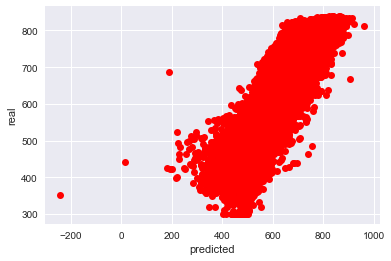

In [33]:
import matplotlib.pyplot as plt
plt.plot(ens_pred, y_test,'ro')
#plt.plot([0,500],[0,500], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

## Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=7, random_state=0, 
                                loss='ls',max_features='sqrt', min_samples_leaf=15, min_samples_split=10
                               ).fit(X_train, y_train)
gbr_pred_train = est.predict(X_train)
gbr_pred = est.predict(X_test)

print ("Train data GBR metrics")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_train, gbr_pred_train)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_train, gbr_pred_train)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_train, gbr_pred_train)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_train, gbr_pred_train)*100,2)))

print ("\n")
print ("GBR metrics")
print ('neg_mean_squared_error - {}'.format(metrics.mean_squared_error(y_test, gbr_pred)))
print ('neg_mean_absolute_error - {}'.format(metrics.mean_absolute_error(y_test, gbr_pred)))
print ('neg_median_absolute_error - {}'.format(metrics.median_absolute_error(y_test, gbr_pred)))
print ('rsquared - {}%'.format(round(metrics.r2_score(y_test, gbr_pred)*100,2)))

Train data GBR metrics
neg_mean_squared_error - 253.567123759
neg_mean_absolute_error - 11.1954818087
neg_median_absolute_error - 7.76005381999
rsquared - 98.19%


GBR metrics
neg_mean_squared_error - 647.100726612
neg_mean_absolute_error - 18.063883146
neg_median_absolute_error - 12.7108490046
rsquared - 95.4%


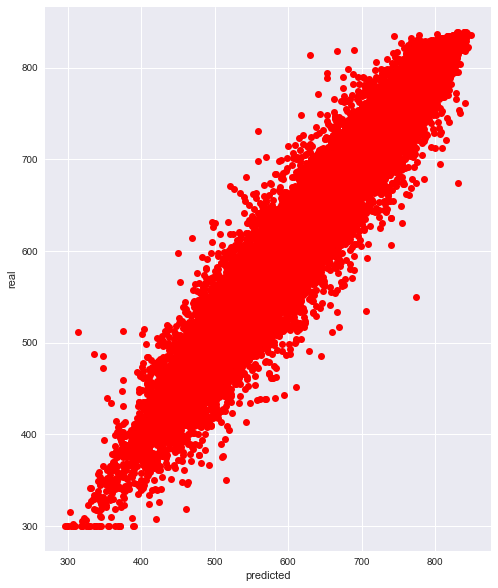

In [79]:
import matplotlib.pyplot as plt
plt.plot(gbr_pred, y_test,'ro')
#plt.plot([0,500],[0,500], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Average R2 score and standart deviation of 5-fold cross-validation
#scores = cross_val_score(est, X_train, y_train, cv=3)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# SGD Regressor

SGD stands for Stochastic Gradient Descent: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).
The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

This implementation works with data represented as dense numpy arrays of floating point values for the features.

Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. Note that the same scaling must be applied to the test vector to obtain meaningful results.
https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning
In the unnormalized case, gradient-based optimization algorithms will have a very hard time to move the weight vectors towards a good solution. However, the cost surface for the normalized case is less elongated and gradient-based optimization methods will do much better and diverge less. 

When there is large dataset then gradient descent becomes a computationally expensive procedure and this is where SGD has an edge to overcome this limitation of Basic Gradient Descent i.e. In GD optimization, we compute the cost gradient based on the complete training set; hence, we sometimes also call it batch GD. In case of very large datasets, using GD can be quite costly since we are only taking a single step for one pass over the training set -- thus, the larger the training set, the slower our algorithm updates the weights and the longer it may take until it converges to the global cost minimum (note that the SSE cost function is convex).
In Stochastic Gradient Descent (SGD; sometimes also referred to as iterative or on-line GD), we don't accumulate the weight updates as we've seen above for GD
It is well suited for regression problems with a large number of training samples (> 10,000), for other problems we recommend Ridge, Lasso, or ElasticNet.

Also have a look at different flavors of SGD
https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent

In [ ]:
from sklearn import linear_model
# train on the data
clf = linear_model.SGDRegressor(loss = "squared_loss", average=True)
fitted = clf.fit( trainDataX, trainDataY)
predicted = clf.predict(testDataX)

# reverse the log
predicted = (np.exp(predicted)).astype(int)

#### or below 
tuned_parameters = {'loss': ['huber'], 'penalty':['l1'],
                    'alpha':[1e-6, 1e-7, 1e-8], 'n_iter':[100], 'p':[0.1]}
clf = GridSearchCV(SGDRegressor(verbose=1), tuned_parameters,
                   score_func=utility.eval_auc, cv=3)

clf.fit(X, y)
for params, avgscore, scores in clf.grid_scores_ :
    print avgscore, params

pred = clf.best_estimator_.predict(X)
print pred

# Bagging Methods (Bootstrap Aggregating)

Implementations vary based on method of drawing random subsets of training data
1. Pasting - random subsets of samples
2. bagging - samples drawn with replacement
3. Random Subspaces - random subsets of the features
4. Random Patches - subsets of both samples and features

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [ ]:
from sklearn import Bagg

# Random Forest Regressor

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=500, n_jobs=-1)
cv_score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=15)

plt.figure(figsize=(10,5))
plt.bar(range(len(cv_score)), cv_score)
plt.title('Cross Validation Score')
plt.ylabel('RMSE')
plt.xlabel('Iteration')

plt.plot(range(len(cv_score) + 1), [cv_score.mean()] * (len(cv_score) + 1))
plt.tight_layout()

# AdaBoost Regressor (Adapting Boosting)
An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

Any type of classifier can be used by boosting. For simplication we can use Decision Tree Stump

There have been several papers on using various other loss functions with boosting that result in less sensitivity to outliers and noise, like savage boost

In [ ]:
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr.fit(X_train, y_train)
# Predict
pred = regr.predict(X_test)

# Support Vector Regressor linear

# Support Vector Regressor Radial

# HuberRegressor
Linear regression model that is robust to outliers.

# KNeighboursRegressor

# Gaussian Process Regressor

# Extra Trees Regressor

# XGBoost

In [65]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

params = {"max_depth":2, "eta":0.1}
xgb_model_cv = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)
xgb_model_cv.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()\


### or 


# Tune hyperparameters with grid search
# I've checked more values, this is just for example
param_grid = {
              'n_estimators': [400, 500],
              'learning_rate': [0.05, 0.1],
             }
xgb_gs = model_selection.GridSearchCV(xgb_regressor, param_grid, cv=3, scoring=rmsle)
xgb_gs.fit(X_selected, y)
print(xgb_gs.best_score_)
print(xgb_gs.best_params_)


ImportError: No module named xgboost

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2,
                 gamma=0.0,
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=7200,                                                                  
                 reg_alpha=0.9,
                 reg_lambda=0.6,
                 subsample=0.2,
                 seed=42,
                 silent=1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)

# MLP Regressor Neural Networks

# Try keras

In [66]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1

model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train_scaled.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")
model.summary()

hist = model.fit(X_train, y_train, validation_data = (X_test, y_test))
pd.Series(model.predict(X_val)[:,0]).hist()

Using TensorFlow backend.


# Ensembling final model
My final ensemble model is an average of Gradient Boosting and Elastic Net predictions. But before that I retrained my models on all train data.


## Getting our SalePrice estimation
Final_labels = (np.exp(GB_model.predict(test_features)) + np.exp(ENST_model.predict(test_features_st))) / 2

preds = 0.7*lasso_preds + 0.3*xgb_preds

# PCA
### Feature reduction

In [ ]:
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

# MDS
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html